# Introduction

This analysis explores data from [Tennis Abstract](https://github.com/JeffSackmann), covering the current **Top 10 ATP and WTA players** as of December 30, 2024. We'll examine player demographics, career trajectories, match statistics, and performance patterns across different surfaces.

**ATP Top 10:** Sinner, Zverev, Alcaraz, Fritz, Medvedev, Ruud, Djokovic, Rublev, De Minaur, Dimitrov

**WTA Top 10:** Sabalenka, Swiatek, Gauff, Paolini, Zheng, Rybakina, Pegula, Navarro, Kasatkina, Krejcikova

In [1]:
#| label: setup
#| code-summary: "Import libraries and load data"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Load all data
DATA_PATH = '../../data/top10'

# ATP data
atp_players = pd.read_csv(f'{DATA_PATH}/atp/atp_top10_players.csv')
atp_rankings = pd.read_csv(f'{DATA_PATH}/atp/atp_top10_rankings.csv')
atp_matches = pd.read_csv(f'{DATA_PATH}/atp/atp_top10_matches.csv')

# WTA data
wta_players = pd.read_csv(f'{DATA_PATH}/wta/wta_top10_players.csv')
wta_rankings = pd.read_csv(f'{DATA_PATH}/wta/wta_top10_rankings.csv')
wta_matches = pd.read_csv(f'{DATA_PATH}/wta/wta_top10_matches.csv')

print(f"ATP: {len(atp_players)} players, {len(atp_rankings):,} ranking records, {len(atp_matches):,} matches")
print(f"WTA: {len(wta_players)} players, {len(wta_rankings):,} ranking records, {len(wta_matches):,} matches")

ATP: 10 players, 5,250 ranking records, 6,899 matches
WTA: 10 players, 4,628 ranking records, 4,653 matches


# Player Demographics

Let's start by examining the basic demographics of our top 10 players.

In [2]:
#| label: player-prep
#| code-summary: "Prepare player data"

def parse_dob(dob):
    """Parse date of birth from YYYYMMDD format"""
    if pd.isna(dob):
        return None
    dob_str = str(int(dob))
    try:
        return datetime.strptime(dob_str, '%Y%m%d')
    except:
        return None

def calculate_age(dob):
    """Calculate current age from DOB"""
    if dob is None:
        return None
    today = datetime(2024, 12, 30)  # Rankings date
    return (today - dob).days / 365.25

# Process ATP players
atp_players['dob_parsed'] = atp_players['dob'].apply(parse_dob)
atp_players['age'] = atp_players['dob_parsed'].apply(calculate_age)
atp_players['full_name'] = atp_players['name_first'] + ' ' + atp_players['name_last']
atp_players['tour'] = 'ATP'

# Process WTA players
wta_players['dob_parsed'] = wta_players['dob'].apply(parse_dob)
wta_players['age'] = wta_players['dob_parsed'].apply(calculate_age)
wta_players['full_name'] = wta_players['name_first'] + ' ' + wta_players['name_last']
wta_players['tour'] = 'WTA'

# Combine for comparison
all_players = pd.concat([atp_players, wta_players], ignore_index=True)

In [3]:
#| label: player-table
#| code-summary: "Display player overview"

# Create summary table
atp_display = atp_players[['full_name', 'ioc', 'age', 'height', 'hand']].copy()
atp_display['age'] = atp_display['age'].round(1)
atp_display.columns = ['Player', 'Country', 'Age', 'Height (cm)', 'Hand']

wta_display = wta_players[['full_name', 'ioc', 'age', 'height', 'hand']].copy()
wta_display['age'] = wta_display['age'].round(1)
wta_display.columns = ['Player', 'Country', 'Age', 'Height (cm)', 'Hand']

print("ATP Top 10 Players:")
display(atp_display.sort_values('Age'))
print("\nWTA Top 10 Players:")
display(wta_display.sort_values('Age'))

ATP Top 10 Players:


,Player,Country,Age,Height (cm),Hand
9,Carlos Alcaraz,ESP,21.7,183,R
8,Jannik Sinner,ITA,23.4,191,R
7,Alex De Minaur,AUS,25.9,183,R
6,Casper Ruud,NOR,26.0,183,R
4,Andrey Rublev,RUS,27.2,188,R
5,Taylor Fritz,USA,27.2,196,R
0,Alexander Zverev,GER,27.7,198,R
3,Daniil Medvedev,RUS,28.9,198,R
2,Grigor Dimitrov,BUL,33.6,191,R
1,Novak Djokovic,SRB,37.6,188,R



WTA Top 10 Players:


,Player,Country,Age,Height (cm),Hand
9,Coco Gauff,USA,20.8,175.0,R
8,Qinwen Zheng,CHN,22.2,NaN,R
6,Emma Navarro,USA,23.6,NaN,R
7,Iga Swiatek,POL,23.6,176.0,R
5,Elena Rybakina,KAZ,25.5,184.0,R
4,Aryna Sabalenka,BLR,26.7,182.0,R
3,Daria Kasatkina,RUS,27.6,170.0,R
1,Barbora Krejcikova,CZE,29.0,178.0,R
2,Jasmine Paolini,ITA,29.0,160.0,R
0,Jessica Pegula,USA,30.8,170.0,R


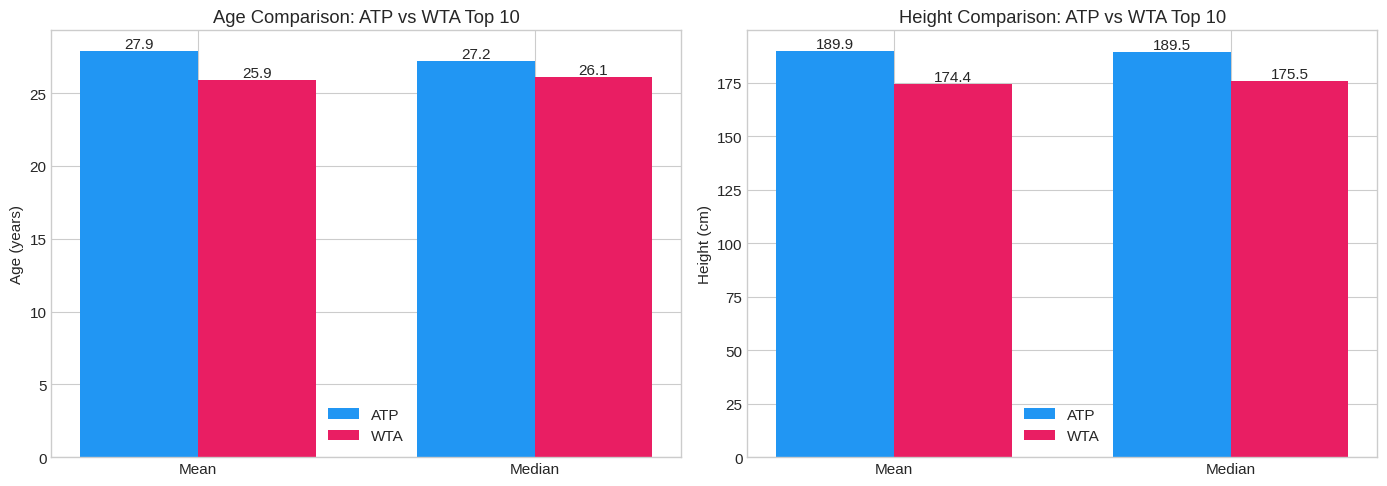


ATP Age Range: 21.7 - 37.6 years
WTA Age Range: 20.8 - 30.8 years


In [4]:
#| label: fig-age-height
#| fig-cap: "Age and Height Distribution of Top 10 Players"
#| code-summary: "Plot age and height comparison"

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age comparison
ax1 = axes[0]
x = np.arange(2)
width = 0.35
atp_ages = atp_players['age'].dropna()
wta_ages = wta_players['age'].dropna()

bars1 = ax1.bar(x - width/2, [atp_ages.mean(), atp_ages.median()], width, label='ATP', color='#2196F3')
bars2 = ax1.bar(x + width/2, [wta_ages.mean(), wta_ages.median()], width, label='WTA', color='#E91E63')
ax1.set_ylabel('Age (years)')
ax1.set_title('Age Comparison: ATP vs WTA Top 10')
ax1.set_xticks(x)
ax1.set_xticklabels(['Mean', 'Median'])
ax1.legend()
ax1.bar_label(bars1, fmt='%.1f')
ax1.bar_label(bars2, fmt='%.1f')

# Height comparison  
ax2 = axes[1]
atp_heights = atp_players['height'].dropna()
wta_heights = wta_players['height'].dropna()

bars3 = ax2.bar(x - width/2, [atp_heights.mean(), atp_heights.median()], width, label='ATP', color='#2196F3')
bars4 = ax2.bar(x + width/2, [wta_heights.mean(), wta_heights.median()], width, label='WTA', color='#E91E63')
ax2.set_ylabel('Height (cm)')
ax2.set_title('Height Comparison: ATP vs WTA Top 10')
ax2.set_xticks(x)
ax2.set_xticklabels(['Mean', 'Median'])
ax2.legend()
ax2.bar_label(bars3, fmt='%.1f')
ax2.bar_label(bars4, fmt='%.1f')

plt.tight_layout()
plt.show()

print(f"\nATP Age Range: {atp_ages.min():.1f} - {atp_ages.max():.1f} years")
print(f"WTA Age Range: {wta_ages.min():.1f} - {wta_ages.max():.1f} years")

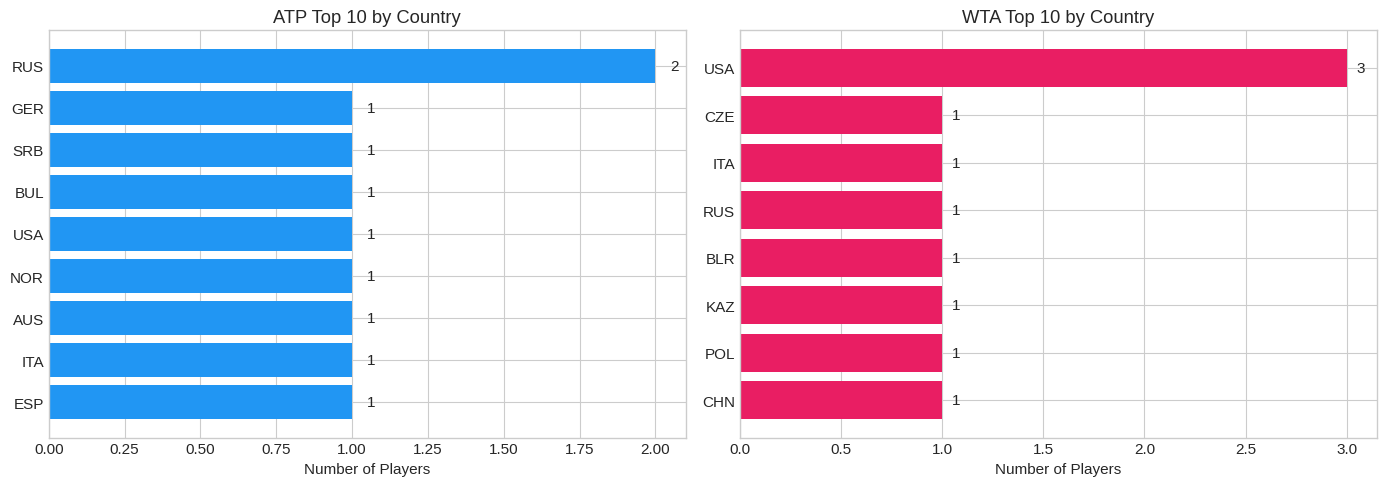

In [5]:
#| label: fig-countries
#| fig-cap: "Country Representation in Top 10"
#| code-summary: "Plot country distribution"

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ATP countries
atp_countries = atp_players['ioc'].value_counts()
axes[0].barh(atp_countries.index, atp_countries.values, color='#2196F3')
axes[0].set_xlabel('Number of Players')
axes[0].set_title('ATP Top 10 by Country')
axes[0].invert_yaxis()
for i, v in enumerate(atp_countries.values):
    axes[0].text(v + 0.05, i, str(v), va='center')

# WTA countries
wta_countries = wta_players['ioc'].value_counts()
axes[1].barh(wta_countries.index, wta_countries.values, color='#E91E63')
axes[1].set_xlabel('Number of Players')
axes[1].set_title('WTA Top 10 by Country')
axes[1].invert_yaxis()
for i, v in enumerate(wta_countries.values):
    axes[1].text(v + 0.05, i, str(v), va='center')

plt.tight_layout()
plt.show()

# Rankings History

Let's examine how these players have risen through the rankings over their careers.

In [6]:
#| label: rankings-prep
#| code-summary: "Prepare rankings data"

# Parse dates and merge with player names
atp_rankings['date'] = pd.to_datetime(atp_rankings['ranking_date'].astype(str), format='%Y%m%d')
atp_rankings = atp_rankings.merge(atp_players[['player_id', 'full_name']], left_on='player', right_on='player_id')

wta_rankings['date'] = pd.to_datetime(wta_rankings['ranking_date'].astype(str), format='%Y%m%d')
wta_rankings = wta_rankings.merge(wta_players[['player_id', 'full_name']], left_on='player', right_on='player_id')

print(f"ATP rankings span: {atp_rankings['date'].min().strftime('%Y-%m-%d')} to {atp_rankings['date'].max().strftime('%Y-%m-%d')}")
print(f"WTA rankings span: {wta_rankings['date'].min().strftime('%Y-%m-%d')} to {wta_rankings['date'].max().strftime('%Y-%m-%d')}")

ATP rankings span: 2003-07-07 to 2024-12-30
WTA rankings span: 2009-06-15 to 2024-12-30


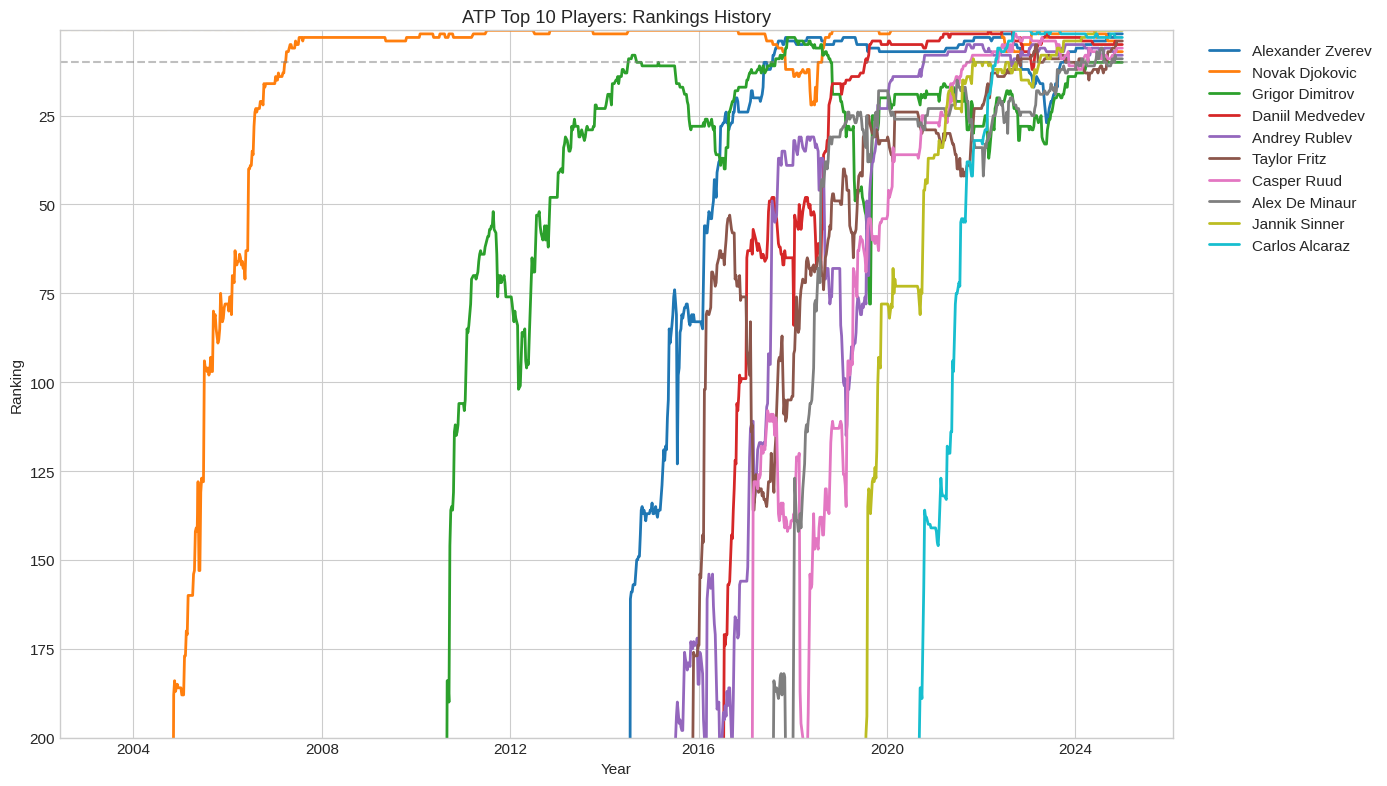

In [7]:
#| label: fig-atp-rankings
#| fig-cap: "ATP Top 10 Rankings Over Time"
#| code-summary: "Plot ATP rankings history"

fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i, player in enumerate(atp_players['full_name']):
    player_data = atp_rankings[atp_rankings['full_name'] == player].sort_values('date')
    ax.plot(player_data['date'], player_data['rank'], label=player, linewidth=2, color=colors[i])

ax.set_ylim(ax.get_ylim()[::-1])  # Invert y-axis (rank 1 at top)
ax.set_ylim(200, 1)
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_title('ATP Top 10 Players: Rankings History')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.axhline(y=10, color='gray', linestyle='--', alpha=0.5, label='Top 10')
ax.axhline(y=1, color='gold', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

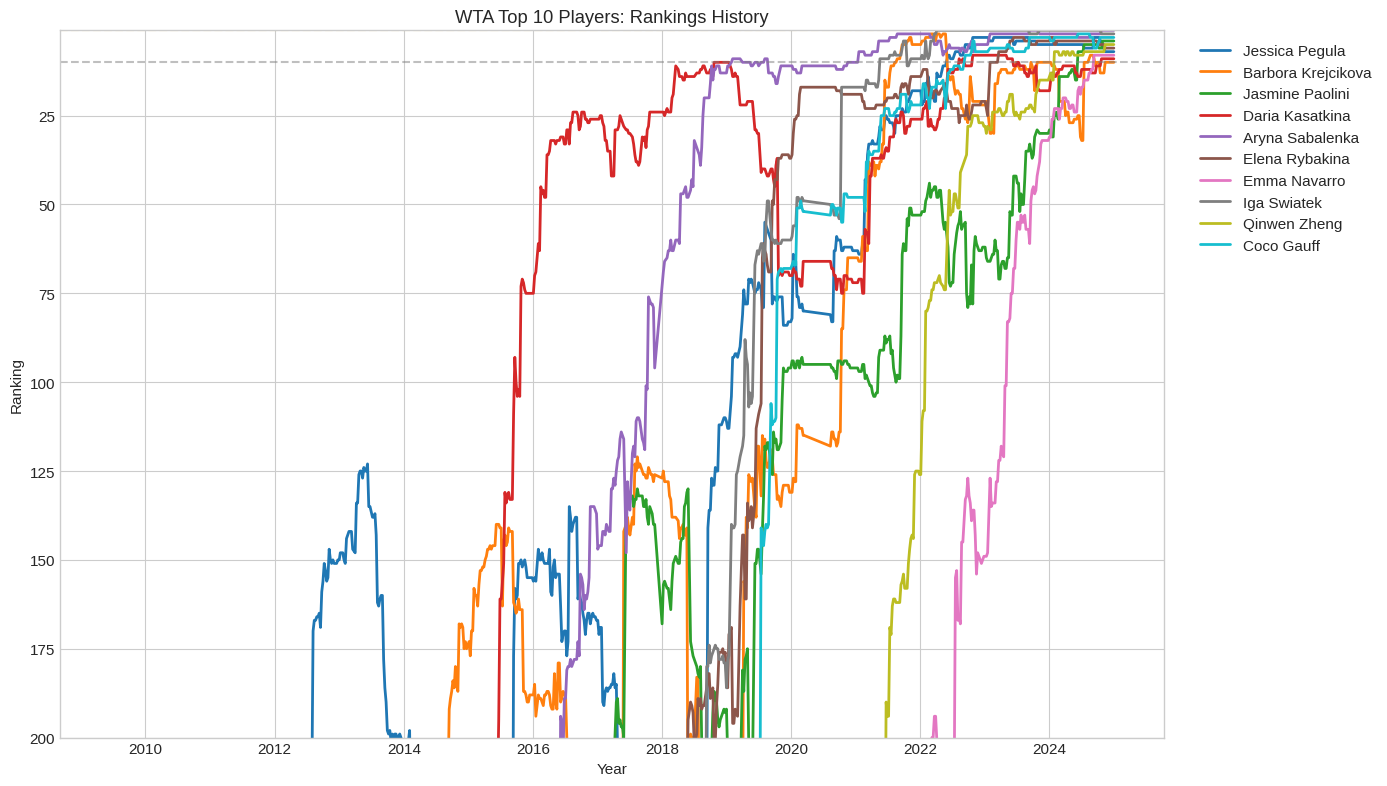

In [8]:
#| label: fig-wta-rankings
#| fig-cap: "WTA Top 10 Rankings Over Time"
#| code-summary: "Plot WTA rankings history"

fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i, player in enumerate(wta_players['full_name']):
    player_data = wta_rankings[wta_rankings['full_name'] == player].sort_values('date')
    ax.plot(player_data['date'], player_data['rank'], label=player, linewidth=2, color=colors[i])

ax.set_ylim(200, 1)
ax.set_xlabel('Year')
ax.set_ylabel('Ranking')
ax.set_title('WTA Top 10 Players: Rankings History')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.axhline(y=10, color='gray', linestyle='--', alpha=0.5)
ax.axhline(y=1, color='gold', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
#| label: weeks-at-1
#| code-summary: "Calculate weeks at #1"

# Calculate weeks at #1 for each player
def weeks_at_rank(rankings_df, rank=1):
    results = []
    for player in rankings_df['full_name'].unique():
        player_data = rankings_df[rankings_df['full_name'] == player]
        weeks = len(player_data[player_data['rank'] == rank])
        results.append({'Player': player, f'Weeks at #{rank}': weeks})
    return pd.DataFrame(results).sort_values(f'Weeks at #{rank}', ascending=False)

print("ATP - Weeks at #1:")
atp_weeks_1 = weeks_at_rank(atp_rankings, 1)
display(atp_weeks_1[atp_weeks_1['Weeks at #1'] > 0])

print("\nWTA - Weeks at #1:")
wta_weeks_1 = weeks_at_rank(wta_rankings, 1)
display(wta_weeks_1[wta_weeks_1['Weeks at #1'] > 0])

ATP - Weeks at #1:


,Player,Weeks at #1
0,Novak Djokovic,377
9,Carlos Alcaraz,31
8,Jannik Sinner,27
2,Daniil Medvedev,13



WTA - Weeks at #1:


,Player,Weeks at #1
6,Iga Swiatek,120
4,Aryna Sabalenka,18


# Match Analysis

Now let's dive into match statistics and performance metrics.

In [10]:
#| label: match-prep
#| code-summary: "Prepare match data"

# Add tour column
atp_matches['tour'] = 'ATP'
wta_matches['tour'] = 'WTA'

# Parse tournament dates
atp_matches['tourney_date'] = pd.to_datetime(atp_matches['tourney_date'].astype(str), format='%Y%m%d')
wta_matches['tourney_date'] = pd.to_datetime(wta_matches['tourney_date'].astype(str), format='%Y%m%d')

print(f"ATP Matches: {len(atp_matches):,} (from {atp_matches['tourney_date'].min().year} to {atp_matches['tourney_date'].max().year})")
print(f"WTA Matches: {len(wta_matches):,} (from {wta_matches['tourney_date'].min().year} to {wta_matches['tourney_date'].max().year})")

ATP Matches: 6,899 (from 2003 to 2024)
WTA Matches: 4,653 (from 2009 to 2024)


In [11]:
#| label: win-loss
#| code-summary: "Calculate win-loss records"

def calculate_record(matches_df, players_df):
    """Calculate win-loss record for each player"""
    records = []
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        wins = len(matches_df[matches_df['winner_id'] == pid])
        losses = len(matches_df[matches_df['loser_id'] == pid])
        total = wins + losses
        win_pct = (wins / total * 100) if total > 0 else 0
        
        records.append({
            'Player': name,
            'Wins': wins,
            'Losses': losses,
            'Win %': round(win_pct, 1)
        })
    
    return pd.DataFrame(records).sort_values('Win %', ascending=False)

print("ATP Career Records (in dataset):")
atp_records = calculate_record(atp_matches, atp_players)
display(atp_records)

print("\nWTA Career Records (in dataset):")
wta_records = calculate_record(wta_matches, wta_players)
display(wta_records)

ATP Career Records (in dataset):


,Player,Wins,Losses,Win %
1,Novak Djokovic,1203,241,83.3
9,Carlos Alcaraz,283,75,79.1
8,Jannik Sinner,335,119,73.8
3,Daniil Medvedev,526,216,70.9
0,Alexander Zverev,527,247,68.1
4,Andrey Rublev,469,260,64.3
6,Casper Ruud,387,223,63.4
7,Alex De Minaur,354,208,63.0
5,Taylor Fritz,395,239,62.3
2,Grigor Dimitrov,582,354,62.2



WTA Career Records (in dataset):


,Player,Wins,Losses,Win %
7,Iga Swiatek,341,77,81.6
8,Qinwen Zheng,218,94,69.9
9,Coco Gauff,224,98,69.6
4,Aryna Sabalenka,408,181,69.3
5,Elena Rybakina,315,147,68.2
3,Daria Kasatkina,381,215,63.9
6,Emma Navarro,193,109,63.9
1,Barbora Krejcikova,386,220,63.7
0,Jessica Pegula,396,240,62.3
2,Jasmine Paolini,352,262,57.3


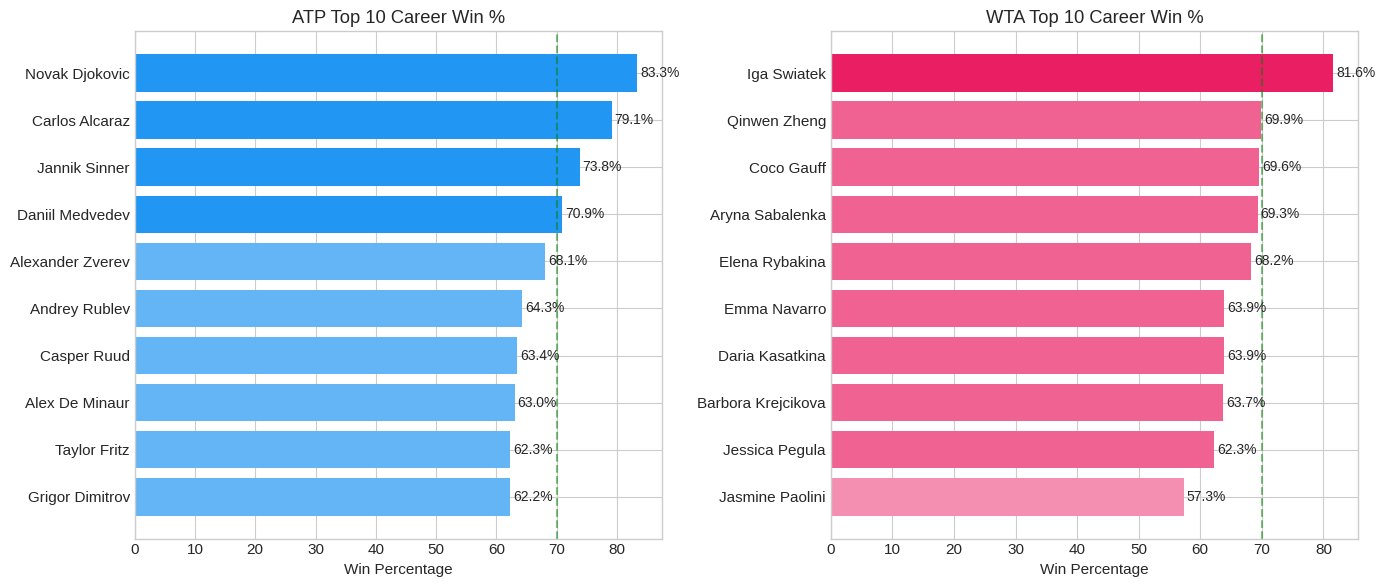

In [12]:
#| label: fig-win-pct
#| fig-cap: "Career Win Percentage Comparison"
#| code-summary: "Plot win percentages"

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ATP
atp_sorted = atp_records.sort_values('Win %', ascending=True)
colors_atp = ['#2196F3' if x >= 70 else '#64B5F6' if x >= 60 else '#90CAF9' for x in atp_sorted['Win %']]
axes[0].barh(atp_sorted['Player'], atp_sorted['Win %'], color=colors_atp)
axes[0].set_xlabel('Win Percentage')
axes[0].set_title('ATP Top 10 Career Win %')
axes[0].axvline(x=70, color='green', linestyle='--', alpha=0.5, label='70%')
for i, (_, row) in enumerate(atp_sorted.iterrows()):
    axes[0].text(row['Win %'] + 0.5, i, f"{row['Win %']}%", va='center', fontsize=10)

# WTA
wta_sorted = wta_records.sort_values('Win %', ascending=True)
colors_wta = ['#E91E63' if x >= 70 else '#F06292' if x >= 60 else '#F48FB1' for x in wta_sorted['Win %']]
axes[1].barh(wta_sorted['Player'], wta_sorted['Win %'], color=colors_wta)
axes[1].set_xlabel('Win Percentage')
axes[1].set_title('WTA Top 10 Career Win %')
axes[1].axvline(x=70, color='green', linestyle='--', alpha=0.5)
for i, (_, row) in enumerate(wta_sorted.iterrows()):
    axes[1].text(row['Win %'] + 0.5, i, f"{row['Win %']}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Surface Performance

Tennis is played on different surfaces (Hard, Clay, Grass, Carpet), and players often have varying performance levels on each.

In [13]:
#| label: surface-analysis
#| code-summary: "Analyze performance by surface"

def surface_record(matches_df, players_df):
    """Calculate win percentage by surface for each player"""
    results = []
    surfaces = matches_df['surface'].dropna().unique()
    
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        row = {'Player': name}
        for surface in surfaces:
            surface_matches = matches_df[matches_df['surface'] == surface]
            wins = len(surface_matches[surface_matches['winner_id'] == pid])
            losses = len(surface_matches[surface_matches['loser_id'] == pid])
            total = wins + losses
            if total >= 10:  # Minimum matches threshold
                row[surface] = round(wins / total * 100, 1)
            else:
                row[surface] = None
        results.append(row)
    
    return pd.DataFrame(results)

print("ATP Win % by Surface (min 10 matches):")
atp_surface = surface_record(atp_matches, atp_players)
display(atp_surface[['Player', 'Hard', 'Clay', 'Grass']].dropna(how='all', subset=['Hard', 'Clay', 'Grass']))

print("\nWTA Win % by Surface (min 10 matches):")
wta_surface = surface_record(wta_matches, wta_players)
display(wta_surface[['Player', 'Hard', 'Clay', 'Grass']].dropna(how='all', subset=['Hard', 'Clay', 'Grass']))

ATP Win % by Surface (min 10 matches):


,Player,Hard,Clay,Grass
0,Alexander Zverev,67.1,70.2,66.1
1,Novak Djokovic,84.4,80.8,86.1
2,Grigor Dimitrov,63.2,61.3,60.0
3,Daniil Medvedev,73.0,63.1,70.0
4,Andrey Rublev,65.0,62.8,62.5
5,Taylor Fritz,63.9,57.0,60.0
6,Casper Ruud,57.8,69.1,38.5
7,Alex De Minaur,64.7,52.8,68.4
8,Jannik Sinner,77.2,66.9,67.6
9,Carlos Alcaraz,76.2,80.1,88.9



WTA Win % by Surface (min 10 matches):


,Player,Hard,Clay,Grass
0,Jessica Pegula,64.3,57.8,58.3
1,Barbora Krejcikova,57.4,69.3,64.5
2,Jasmine Paolini,53.8,61.4,46.2
3,Daria Kasatkina,61.0,69.3,66.0
4,Aryna Sabalenka,71.1,64.3,64.2
5,Elena Rybakina,66.9,68.6,75.0
6,Emma Navarro,59.2,66.5,70.0
7,Iga Swiatek,79.6,87.8,66.7
8,Qinwen Zheng,68.6,76.6,27.3
9,Coco Gauff,69.4,69.5,70.6


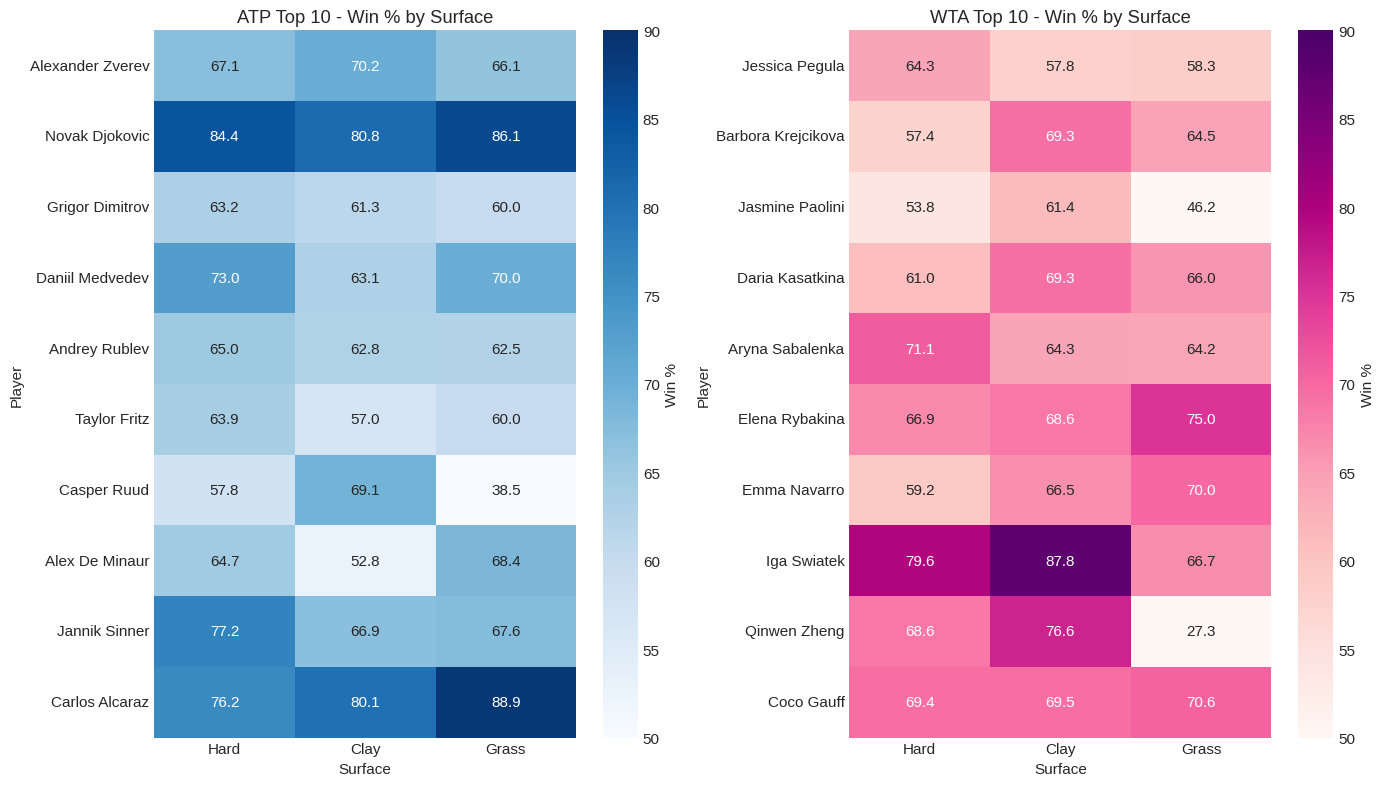

In [14]:
#| label: fig-surface-heatmap
#| fig-cap: "Surface Performance Heatmap"
#| code-summary: "Plot surface performance heatmaps"

fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ATP heatmap
atp_surface_plot = atp_surface.set_index('Player')[['Hard', 'Clay', 'Grass']].dropna(how='all')
sns.heatmap(atp_surface_plot, annot=True, fmt='.1f', cmap='Blues', ax=axes[0], 
            vmin=50, vmax=90, cbar_kws={'label': 'Win %'})
axes[0].set_title('ATP Top 10 - Win % by Surface')
axes[0].set_xlabel('Surface')

# WTA heatmap
wta_surface_plot = wta_surface.set_index('Player')[['Hard', 'Clay', 'Grass']].dropna(how='all')
sns.heatmap(wta_surface_plot, annot=True, fmt='.1f', cmap='RdPu', ax=axes[1],
            vmin=50, vmax=90, cbar_kws={'label': 'Win %'})
axes[1].set_title('WTA Top 10 - Win % by Surface')
axes[1].set_xlabel('Surface')

plt.tight_layout()
plt.show()

# Serve Statistics

The serve is one of the most important shots in tennis. Let's analyze serve statistics for our top players.

In [15]:
#| label: serve-stats
#| code-summary: "Calculate serve statistics"

def calculate_serve_stats(matches_df, players_df):
    """Calculate average serve statistics for each player"""
    results = []
    
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        # When player won
        wins = matches_df[matches_df['winner_id'] == pid].copy()
        wins['aces'] = wins['w_ace']
        wins['df'] = wins['w_df']
        wins['1st_in'] = wins['w_1stIn'] / wins['w_svpt'] * 100
        wins['1st_won'] = wins['w_1stWon'] / wins['w_1stIn'] * 100
        wins['2nd_won'] = wins['w_2ndWon'] / (wins['w_svpt'] - wins['w_1stIn']) * 100
        
        # When player lost
        losses = matches_df[matches_df['loser_id'] == pid].copy()
        losses['aces'] = losses['l_ace']
        losses['df'] = losses['l_df']
        losses['1st_in'] = losses['l_1stIn'] / losses['l_svpt'] * 100
        losses['1st_won'] = losses['l_1stWon'] / losses['l_1stIn'] * 100
        losses['2nd_won'] = losses['l_2ndWon'] / (losses['l_svpt'] - losses['l_1stIn']) * 100
        
        # Combine
        all_matches = pd.concat([wins, losses])
        
        if len(all_matches) > 0:
            results.append({
                'Player': name,
                'Avg Aces/Match': round(all_matches['aces'].mean(), 1),
                'Avg DFs/Match': round(all_matches['df'].mean(), 1),
                '1st Serve %': round(all_matches['1st_in'].mean(), 1),
                '1st Serve Win %': round(all_matches['1st_won'].mean(), 1),
                '2nd Serve Win %': round(all_matches['2nd_won'].mean(), 1)
            })
    
    return pd.DataFrame(results)

print("ATP Serve Statistics:")
atp_serve = calculate_serve_stats(atp_matches, atp_players)
display(atp_serve.sort_values('Avg Aces/Match', ascending=False))

print("\nWTA Serve Statistics:")
wta_serve = calculate_serve_stats(wta_matches, wta_players)
display(wta_serve.sort_values('Avg Aces/Match', ascending=False))

ATP Serve Statistics:


,Player,Avg Aces/Match,Avg DFs/Match,1st Serve %,1st Serve Win %,2nd Serve Win %
5,Taylor Fritz,9.3,2.4,59.7,77.0,53.4
0,Alexander Zverev,8.2,3.7,65.9,74.8,51.6
3,Daniil Medvedev,7.6,3.6,61.2,75.4,52.1
2,Grigor Dimitrov,7.0,3.4,61.9,75.9,52.1
4,Andrey Rublev,6.7,2.7,60.4,75.3,51.3
8,Jannik Sinner,5.8,2.2,59.6,75.2,55.1
1,Novak Djokovic,5.7,2.3,65.0,75.0,56.9
6,Casper Ruud,4.8,2.3,64.9,72.0,54.3
7,Alex De Minaur,3.7,2.6,58.7,71.2,53.5
9,Carlos Alcaraz,3.5,2.3,65.8,71.2,56.0



WTA Serve Statistics:


,Player,Avg Aces/Match,Avg DFs/Match,1st Serve %,1st Serve Win %,2nd Serve Win %
8,Qinwen Zheng,6.5,4.5,51.9,75.3,46.4
5,Elena Rybakina,5.9,3.1,58.6,72.0,49.8
4,Aryna Sabalenka,4.9,4.9,60.4,70.2,48.4
9,Coco Gauff,3.9,5.2,61.0,69.4,45.9
1,Barbora Krejcikova,3.2,4.1,61.0,68.0,46.6
0,Jessica Pegula,2.5,2.6,59.3,66.2,49.7
7,Iga Swiatek,2.3,2.2,62.7,69.1,54.6
3,Daria Kasatkina,1.5,4.0,67.5,61.1,43.1
6,Emma Navarro,1.4,2.6,62.8,63.4,47.9
2,Jasmine Paolini,1.0,2.3,65.7,60.2,46.5


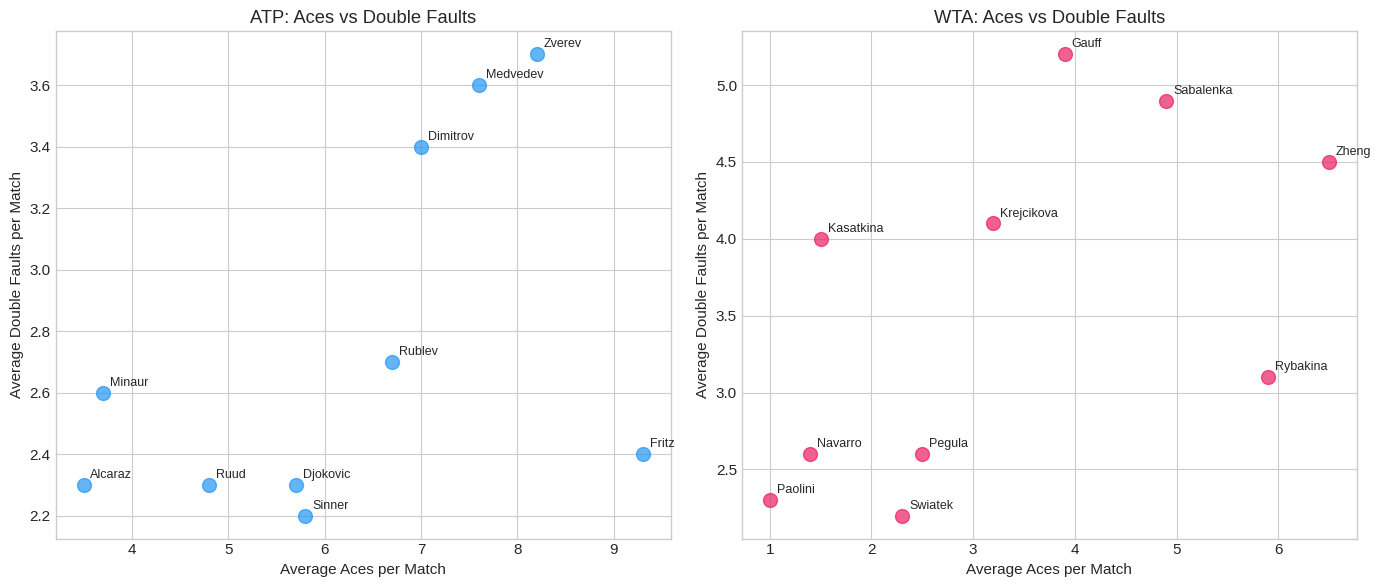

In [16]:
#| label: fig-serve-comparison
#| fig-cap: "Serve Performance: Aces vs Double Faults"
#| code-summary: "Plot serve performance scatter"

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ATP
ax = axes[0]
ax.scatter(atp_serve['Avg Aces/Match'], atp_serve['Avg DFs/Match'], s=100, c='#2196F3', alpha=0.7)
for _, row in atp_serve.iterrows():
    ax.annotate(row['Player'].split()[-1], (row['Avg Aces/Match'], row['Avg DFs/Match']), 
                textcoords='offset points', xytext=(5, 5), fontsize=9)
ax.set_xlabel('Average Aces per Match')
ax.set_ylabel('Average Double Faults per Match')
ax.set_title('ATP: Aces vs Double Faults')

# WTA
ax = axes[1]
ax.scatter(wta_serve['Avg Aces/Match'], wta_serve['Avg DFs/Match'], s=100, c='#E91E63', alpha=0.7)
for _, row in wta_serve.iterrows():
    ax.annotate(row['Player'].split()[-1], (row['Avg Aces/Match'], row['Avg DFs/Match']),
                textcoords='offset points', xytext=(5, 5), fontsize=9)
ax.set_xlabel('Average Aces per Match')
ax.set_ylabel('Average Double Faults per Match')
ax.set_title('WTA: Aces vs Double Faults')

plt.tight_layout()
plt.show()

# Tournament Performance

Let's examine performance at different tournament levels (Grand Slams, Masters, etc.).

In [17]:
#| label: tournament-levels
#| code-summary: "Analyze tournament level performance"

# Tournament level mapping
level_names = {
    'G': 'Grand Slam',
    'M': 'Masters 1000',
    'A': 'ATP 500/250',
    'F': 'Tour Finals',
    'D': 'Davis Cup'
}

def tournament_record(matches_df, players_df):
    """Calculate win percentage by tournament level"""
    results = []
    
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        row = {'Player': name}
        for level, level_name in level_names.items():
            level_matches = matches_df[matches_df['tourney_level'] == level]
            wins = len(level_matches[level_matches['winner_id'] == pid])
            losses = len(level_matches[level_matches['loser_id'] == pid])
            total = wins + losses
            if total >= 5:
                row[level_name] = f"{wins}-{losses}"
                row[f'{level_name}_pct'] = round(wins / total * 100, 1)
            else:
                row[level_name] = '-'
                row[f'{level_name}_pct'] = None
        results.append(row)
    
    return pd.DataFrame(results)

print("ATP Records by Tournament Level:")
atp_tourney = tournament_record(atp_matches, atp_players)
display(atp_tourney[['Player', 'Grand Slam', 'Masters 1000', 'Tour Finals']])

print("\nWTA Records by Tournament Level:")
wta_tourney = tournament_record(wta_matches, wta_players)
display(wta_tourney[['Player', 'Grand Slam', 'Masters 1000', 'Tour Finals']])

ATP Records by Tournament Level:


,Player,Grand Slam,Masters 1000,Tour Finals
0,Alexander Zverev,106-38,148-63,15-9
1,Novak Djokovic,389-52,416-91,47-17
2,Grigor Dimitrov,102-58,149-104,5-0
3,Daniil Medvedev,90-31,110-51,13-11
4,Andrey Rublev,79-33,83-59,10-13
5,Taylor Fritz,60-36,86-60,6-6
6,Casper Ruud,60-29,68-47,8-8
7,Alex De Minaur,51-31,52-47,8-5
8,Jannik Sinner,64-19,81-30,10-2
9,Carlos Alcaraz,66-12,65-21,-



WTA Records by Tournament Level:


,Player,Grand Slam,Masters 1000,Tour Finals
0,Jessica Pegula,64-35,-,4-6
1,Barbora Krejcikova,59-32,-,3-6
2,Jasmine Paolini,29-31,-,-
3,Daria Kasatkina,54-36,-,4-5
4,Aryna Sabalenka,82-27,-,13-9
5,Elena Rybakina,58-23,-,2-4
6,Emma Navarro,15-9,-,-
7,Iga Swiatek,86-18,-,11-4
8,Qinwen Zheng,29-12,-,6-3
9,Coco Gauff,64-22,-,6-6


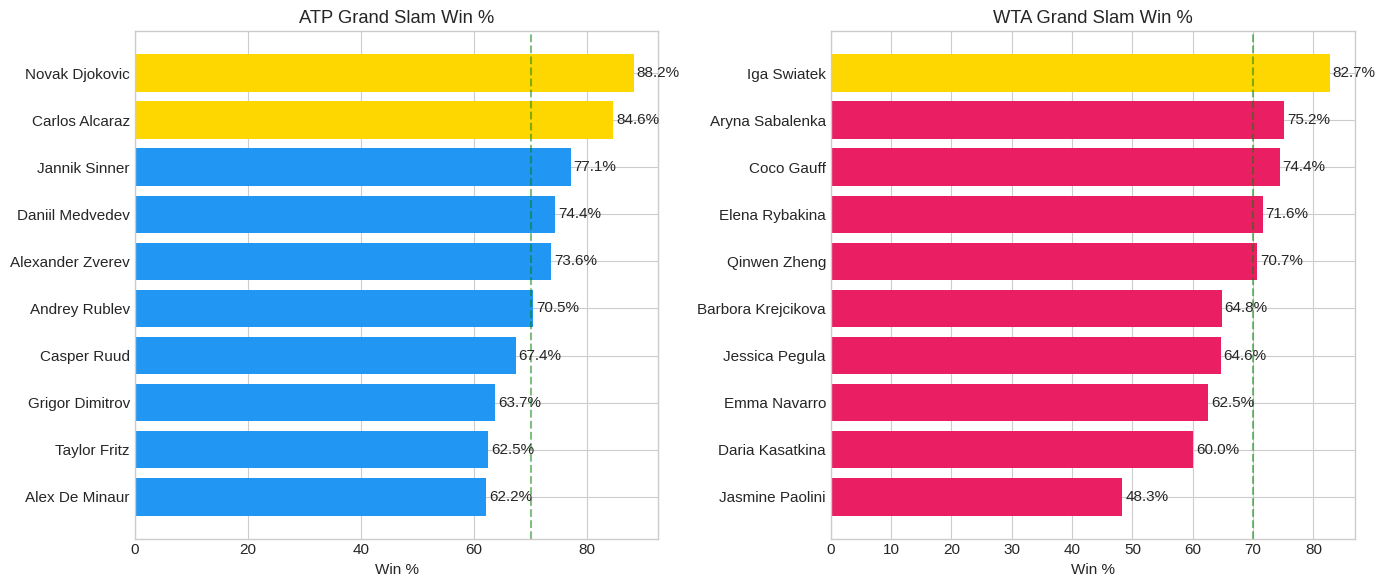

In [18]:
#| label: fig-grand-slams
#| fig-cap: "Grand Slam Win Percentage"
#| code-summary: "Plot Grand Slam performance"

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ATP Grand Slams
atp_gs = atp_tourney[['Player', 'Grand Slam_pct']].dropna().sort_values('Grand Slam_pct', ascending=True)
colors = ['gold' if x >= 80 else '#2196F3' for x in atp_gs['Grand Slam_pct']]
axes[0].barh(atp_gs['Player'], atp_gs['Grand Slam_pct'], color=colors)
axes[0].set_xlabel('Win %')
axes[0].set_title('ATP Grand Slam Win %')
axes[0].axvline(x=70, color='green', linestyle='--', alpha=0.5)
for i, (_, row) in enumerate(atp_gs.iterrows()):
    axes[0].text(row['Grand Slam_pct'] + 0.5, i, f"{row['Grand Slam_pct']}%", va='center')

# WTA Grand Slams
wta_gs = wta_tourney[['Player', 'Grand Slam_pct']].dropna().sort_values('Grand Slam_pct', ascending=True)
colors = ['gold' if x >= 80 else '#E91E63' for x in wta_gs['Grand Slam_pct']]
axes[1].barh(wta_gs['Player'], wta_gs['Grand Slam_pct'], color=colors)
axes[1].set_xlabel('Win %')
axes[1].set_title('WTA Grand Slam Win %')
axes[1].axvline(x=70, color='green', linestyle='--', alpha=0.5)
for i, (_, row) in enumerate(wta_gs.iterrows()):
    axes[1].text(row['Grand Slam_pct'] + 0.5, i, f"{row['Grand Slam_pct']}%", va='center')

plt.tight_layout()
plt.show()

# Head-to-Head Analysis

Let's look at how the top 10 players have fared against each other.

In [19]:
#| label: h2h
#| code-summary: "Calculate head-to-head records"

def head_to_head_matrix(matches_df, players_df):
    """Create head-to-head matrix for players"""
    player_ids = players_df['player_id'].tolist()
    player_names = players_df['full_name'].tolist()
    
    # Filter matches between top 10 players only
    h2h_matches = matches_df[
        (matches_df['winner_id'].isin(player_ids)) & 
        (matches_df['loser_id'].isin(player_ids))
    ]
    
    # Create matrix
    matrix = pd.DataFrame(index=player_names, columns=player_names)
    
    for i, p1_id in enumerate(player_ids):
        for j, p2_id in enumerate(player_ids):
            if i == j:
                matrix.iloc[i, j] = '-'
            else:
                wins = len(h2h_matches[(h2h_matches['winner_id'] == p1_id) & (h2h_matches['loser_id'] == p2_id)])
                losses = len(h2h_matches[(h2h_matches['winner_id'] == p2_id) & (h2h_matches['loser_id'] == p1_id)])
                if wins + losses > 0:
                    matrix.iloc[i, j] = f"{wins}-{losses}"
                else:
                    matrix.iloc[i, j] = '0-0'
    
    return matrix, h2h_matches

print("ATP Head-to-Head (rows vs columns):")
atp_h2h, atp_h2h_matches = head_to_head_matrix(atp_matches, atp_players)
# Shorten names for display
atp_h2h.index = [n.split()[-1] for n in atp_h2h.index]
atp_h2h.columns = [n.split()[-1] for n in atp_h2h.columns]
display(atp_h2h)

print(f"\nTotal H2H matches among ATP Top 10: {len(atp_h2h_matches)}")

ATP Head-to-Head (rows vs columns):


,Zverev,Djokovic,Dimitrov,Medvedev,Rublev,Fritz,Ruud,Minaur,Sinner,Alcaraz
Zverev,-,4-8,7-2,7-12,7-3,5-7,5-2,8-2,4-2,6-5
Djokovic,8-4,-,12-1,10-5,5-1,10-0,5-2,3-1,4-4,4-3
Dimitrov,2-7,1-12,-,3-8,4-4,1-2,1-1,2-4,1-4,2-3
Medvedev,12-7,5-10,8-3,-,8-2,1-1,3-0,7-3,7-8,2-6
Rublev,3-7,1-5,4-4,2-8,-,4-4,5-3,3-4,3-6,1-2
Fritz,7-5,0-10,2-1,1-1,4-4,-,1-2,5-6,1-4,0-2
Ruud,2-5,2-5,1-1,0-3,3-5,2-1,-,1-2,0-3,1-4
Minaur,2-8,1-3,4-2,3-7,4-3,6-5,2-1,-,1-9,0-2
Sinner,2-4,4-4,4-1,8-7,6-3,4-1,3-0,9-1,-,4-7
Alcaraz,5-6,3-4,3-2,6-2,2-1,2-0,4-1,2-0,7-4,-



Total H2H matches among ATP Top 10: 344


In [20]:
#| label: wta-h2h
#| code-summary: "WTA head-to-head"

print("WTA Head-to-Head (rows vs columns):")
wta_h2h, wta_h2h_matches = head_to_head_matrix(wta_matches, wta_players)
wta_h2h.index = [n.split()[-1] for n in wta_h2h.index]
wta_h2h.columns = [n.split()[-1] for n in wta_h2h.columns]
display(wta_h2h)

print(f"\nTotal H2H matches among WTA Top 10: {len(wta_h2h_matches)}")

WTA Head-to-Head (rows vs columns):


,Pegula,Krejcikova,Paolini,Kasatkina,Sabalenka,Rybakina,Navarro,Swiatek,Zheng,Gauff
Pegula,-,1-2,5-0,2-2,2-6,3-1,1-0,4-6,1-0,4-2
Krejcikova,2-1,-,2-0,3-2,1-6,3-0,0-0,2-3,0-2,2-0
Paolini,0-5,0-2,-,3-3,2-3,4-2,1-3,0-4,0-4,0-2
Kasatkina,2-2,2-3,3-3,-,2-7,2-3,0-0,1-6,0-1,3-0
Sabalenka,6-2,6-1,3-2,7-2,-,6-4,2-1,4-8,5-0,4-5
Rybakina,1-3,0-3,2-4,3-2,4-6,-,2-0,4-2,2-1,0-2
Navarro,0-1,0-0,3-1,0-0,1-2,0-2,-,0-1,0-2,2-1
Swiatek,6-4,3-2,4-0,6-1,8-4,2-4,1-0,-,6-1,11-2
Zheng,0-1,2-0,4-0,1-0,0-5,1-2,2-0,1-6,-,0-2
Gauff,2-4,0-2,2-0,0-3,5-4,2-0,1-2,2-11,2-0,-



Total H2H matches among WTA Top 10: 204


# Match Duration Analysis

Let's analyze match lengths and how players perform in long vs short matches.

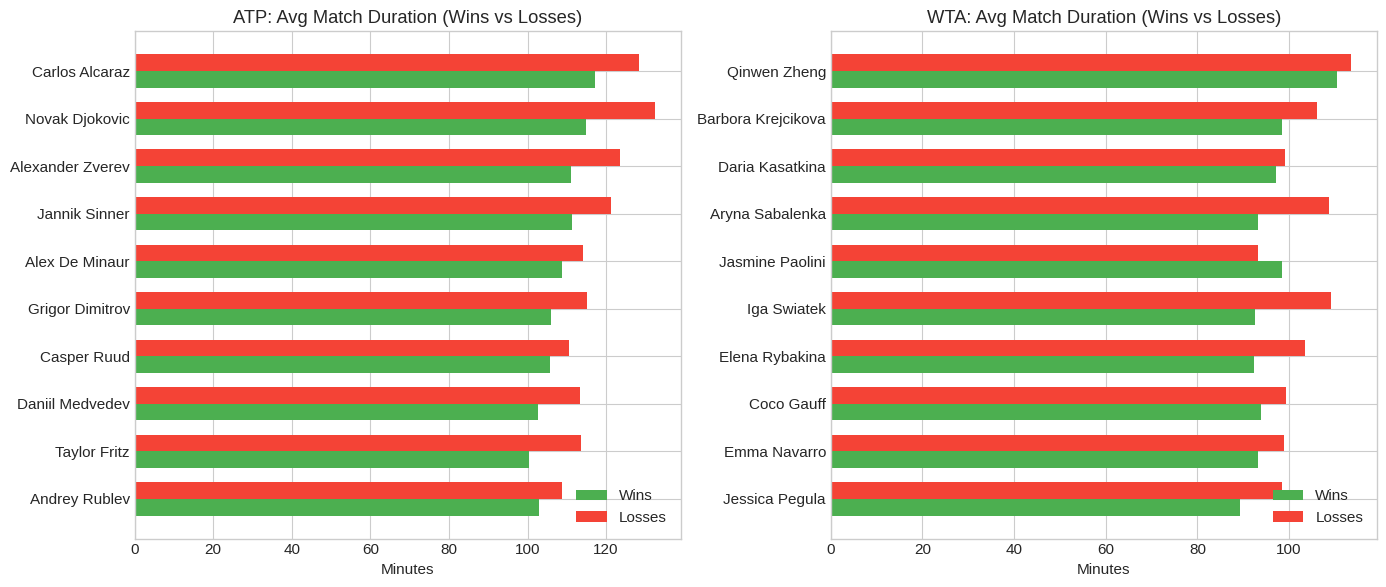

In [21]:
#| label: fig-duration
#| fig-cap: "Average Match Duration"
#| code-summary: "Analyze match duration"

def avg_match_duration(matches_df, players_df):
    """Calculate average match duration for each player"""
    results = []
    
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        # Matches as winner
        wins = matches_df[matches_df['winner_id'] == pid]['minutes'].dropna()
        # Matches as loser
        losses = matches_df[matches_df['loser_id'] == pid]['minutes'].dropna()
        
        all_mins = pd.concat([wins, losses])
        
        if len(all_mins) > 0:
            results.append({
                'Player': name,
                'Avg Duration (min)': round(all_mins.mean(), 1),
                'Avg Win Duration': round(wins.mean(), 1) if len(wins) > 0 else None,
                'Avg Loss Duration': round(losses.mean(), 1) if len(losses) > 0 else None
            })
    
    return pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ATP
atp_duration = avg_match_duration(atp_matches, atp_players).sort_values('Avg Duration (min)')
x = np.arange(len(atp_duration))
width = 0.35
axes[0].barh(x - width/2, atp_duration['Avg Win Duration'], width, label='Wins', color='#4CAF50')
axes[0].barh(x + width/2, atp_duration['Avg Loss Duration'], width, label='Losses', color='#f44336')
axes[0].set_yticks(x)
axes[0].set_yticklabels(atp_duration['Player'])
axes[0].set_xlabel('Minutes')
axes[0].set_title('ATP: Avg Match Duration (Wins vs Losses)')
axes[0].legend()

# WTA
wta_duration = avg_match_duration(wta_matches, wta_players).sort_values('Avg Duration (min)')
x = np.arange(len(wta_duration))
axes[1].barh(x - width/2, wta_duration['Avg Win Duration'], width, label='Wins', color='#4CAF50')
axes[1].barh(x + width/2, wta_duration['Avg Loss Duration'], width, label='Losses', color='#f44336')
axes[1].set_yticks(x)
axes[1].set_yticklabels(wta_duration['Player'])
axes[1].set_xlabel('Minutes')
axes[1].set_title('WTA: Avg Match Duration (Wins vs Losses)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Year-over-Year Performance

Finally, let's look at how these players have performed over the years.

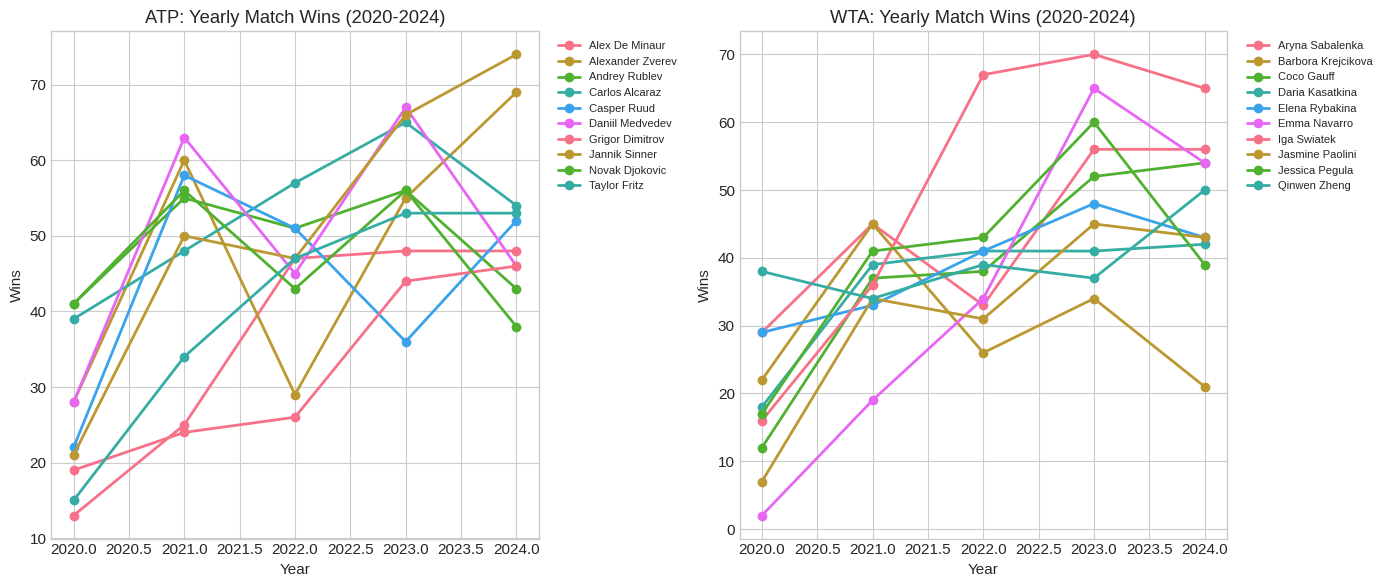

In [22]:
#| label: fig-yearly-wins
#| fig-cap: "Yearly Match Wins (2020-2024)"
#| code-summary: "Plot yearly wins"

def yearly_wins(matches_df, players_df, start_year=2020):
    """Calculate wins per year for each player"""
    matches_df = matches_df[matches_df['tourney_date'].dt.year >= start_year].copy()
    matches_df['year'] = matches_df['tourney_date'].dt.year
    
    results = []
    for _, player in players_df.iterrows():
        pid = player['player_id']
        name = player['full_name']
        
        for year in range(start_year, 2025):
            year_matches = matches_df[matches_df['year'] == year]
            wins = len(year_matches[year_matches['winner_id'] == pid])
            results.append({'Player': name, 'Year': year, 'Wins': wins})
    
    return pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ATP
atp_yearly = yearly_wins(atp_matches, atp_players)
atp_pivot = atp_yearly.pivot(index='Year', columns='Player', values='Wins')
atp_pivot.plot(ax=axes[0], marker='o', linewidth=2)
axes[0].set_title('ATP: Yearly Match Wins (2020-2024)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Wins')
axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

# WTA
wta_yearly = yearly_wins(wta_matches, wta_players)
wta_pivot = wta_yearly.pivot(index='Year', columns='Player', values='Wins')
wta_pivot.plot(ax=axes[1], marker='o', linewidth=2)
axes[1].set_title('WTA: Yearly Match Wins (2020-2024)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Wins')
axes[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Summary

## Key Findings

### ATP Tour
- **Novak Djokovic** remains the GOAT with the most weeks at #1 and highest Grand Slam win percentage among active players
- **Jannik Sinner** and **Carlos Alcaraz** represent the new generation with rapidly rising rankings
- **Alexander Zverev** leads in aces per match among the top 10
- Russia has strong representation with Medvedev and Rublev both in the top 10

### WTA Tour
- **Iga Swiatek** dominated with the most weeks at #1 in recent years
- **Aryna Sabalenka** has been the most consistent performer in 2024
- **Coco Gauff** is the youngest player in the top 10, showing massive potential
- The USA leads with 3 players in the top 10 (Gauff, Pegula, Navarro)

### Cross-Tour Observations
- ATP matches are generally longer due to best-of-5 format in Grand Slams
- Both tours show increasing competitiveness at the top level
- Surface specialists still exist but all-court players dominate the rankings

---

*Data source: [Tennis Abstract](https://github.com/JeffSackmann) by Jeff Sackmann, licensed under CC BY-NC-SA 4.0*